# ML&Fintech HW1 Part 2

## Problem 10

(a) To begin, load in the Boston data set, which is part of the `ISLP` library.

In [37]:
from ISLP import load_data
import pandas as pd
import numpy as np
from statistics import median

Boston = load_data('Boston')

---

(b) How many rows are in this data set? How many columns? What do the rows and columns represent?

In [4]:
Boston.shape

(506, 13)

After running `shape`, we know that there are 506 rows and 13 columns.

In [43]:
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

It is hard to understand what the column variables represent just from their abbreviations, but I find them on the [website](https://islp.readthedocs.io/en/latest/datasets/Boston.html).
- `crim`: per capita crime rate by town.
- `zn`: proportion of residential land zoned for lots over 25,000 sq.ft.
- `indus`: proportion of non-retail business acres per town.
- `chas`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- `nox`: nitrogen oxides concentration (parts per 10 million).
- `rm`: average number of rooms per dwelling.
- `age`: proportion of owner-occupied units built prior to 1940.
- `dis`: weighted mean of distances to five Boston employment centres.
- `rad`: index of accessibility to radial highways.
- `tax`: full-value property-tax rate per $10,000.
- `ptratio`: pupil-teacher ratio by town.
- `lstat`: lower status of the population (percent).
- `medv`: median value of owner-occupied homes in $1000s. 

In [6]:
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


This shows that the rows represent 506 suburbs in Boston.

---

(c) Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings.

To achieve, we use `scatter_matrix` function.

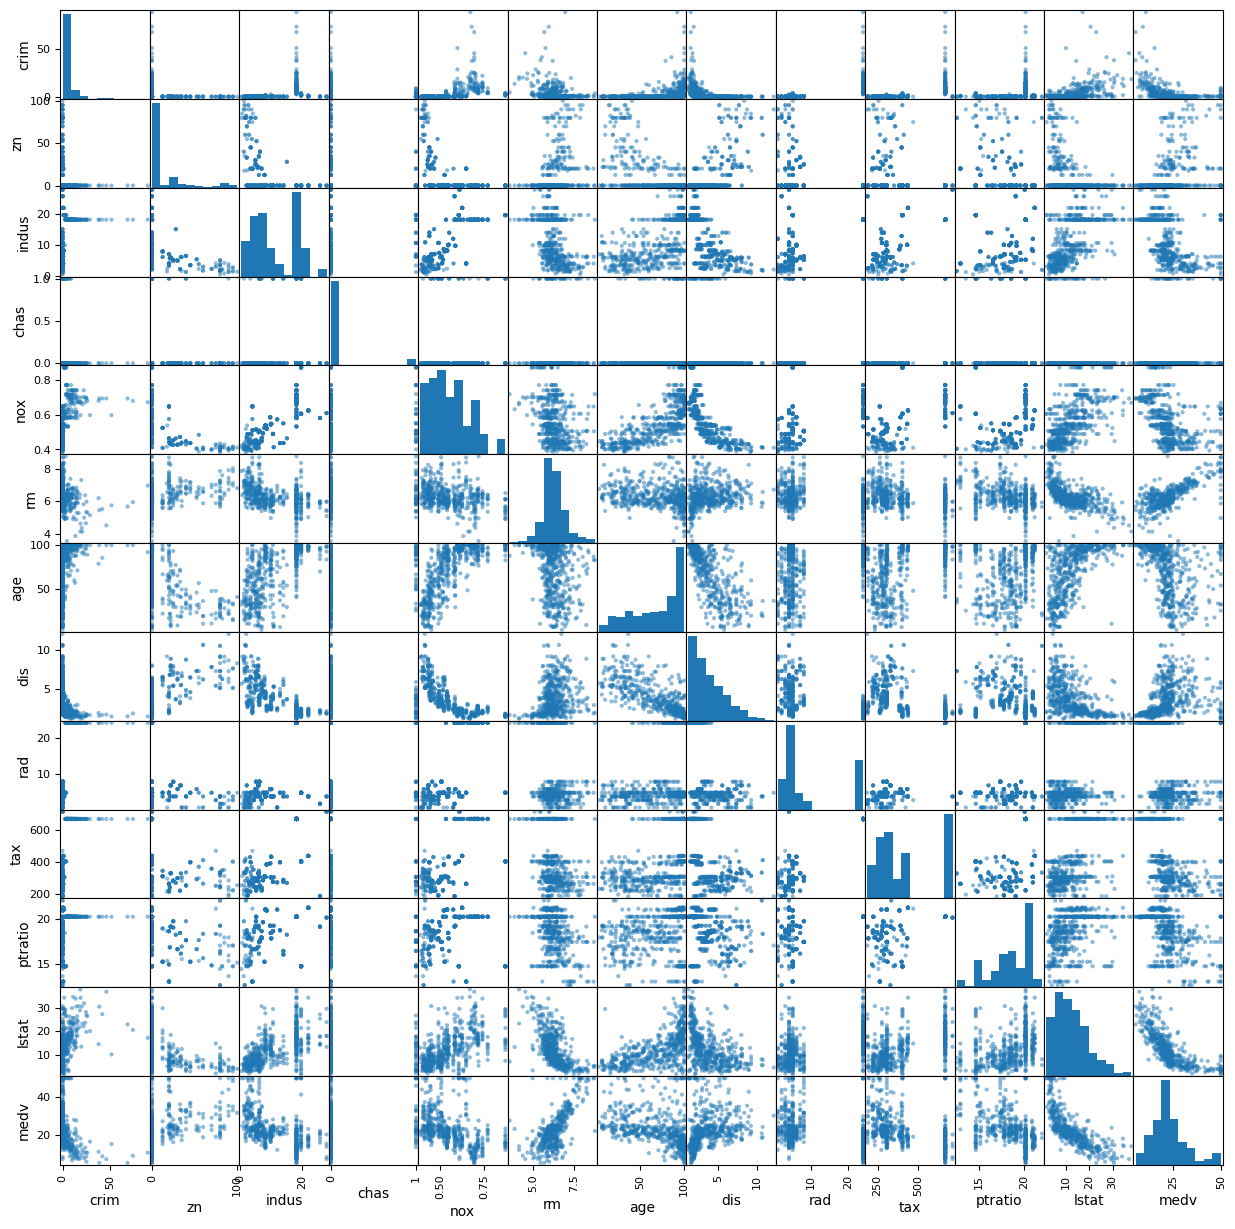

In [40]:
ax = pd.plotting.scatter_matrix(Boston, figsize=(15, 15))

Here are my key findings:
- `chas` seems to have no correlation between any other variables.
- `rm` has positive correlation with `medv` and has negative correlation with `lstat`.
- `lstat` and `medv` have negative correlative relation.
- `dis` and `age` have negative correlative relation.
- `nox` and `age` have positive correlation relation.
- `rm` has negative correlative relation with `lstat` and positive one with `medv`.

---

(d) Are any of the predictors associated with per capita crime rate (`crim`)? If so, explain the relationship.

In [39]:
correlation_with_crim = Boston.corr()['crim']

correlation_with_crim

crim       1.000000
zn        -0.200469
indus      0.406583
chas      -0.055892
nox        0.420972
rm        -0.219247
age        0.352734
dis       -0.379670
rad        0.625505
tax        0.582764
ptratio    0.289946
lstat      0.455621
medv      -0.388305
Name: crim, dtype: float64

I categorise all the predictors into  classes:
- $|r|\in [0,\,0.3)$: *no correlation*
- $|r|\in [0.3,\,0.5)$: *weak correlation*
- $|r|\in [0.5,\,0.7)$: *moderate correlation*
- $|r|\in [0.7,\; 1]$: *strong correlation*

In table:
|Strong Negative|Moderate Negative|Weak Negative|No Correlation|Weak Positive|Moderate Positive|Strong Positive|
|---|---|---|---|---|---|---|
|||`dis`, `medv`|`zn`, `chas`, `rm`, `ptratio`|`indus`, `nox`, `age`, `lstat`|`rad`, `tax`||

Even though `rad` and `tax` has high magnitude of $r$, but the scatter plots do not seem to have linear relation between them.\
For moderate positive class, the linear relation appears only on `nox`, `age` and `lstat` only.\
`dis` and `medv` both show a slight negative linear relation to `crim`.

**Conclusion:** `crim` has visible, moderate positive correlation to `nox`, `age` and `lstat`, and slight negative correlation to `dis` and `medv`.

---

(e) Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.

In [11]:
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [12]:
Boston.sort_values(by='crim', ascending=False)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
380,88.97620,0.0,18.10,0,0.671,6.968,91.9,1.4165,24,666,20.2,17.21,10.4
418,73.53410,0.0,18.10,0,0.679,5.957,100.0,1.8026,24,666,20.2,20.62,8.8
405,67.92080,0.0,18.10,0,0.693,5.683,100.0,1.4254,24,666,20.2,22.98,5.0
410,51.13580,0.0,18.10,0,0.597,5.757,100.0,1.4130,24,666,20.2,10.11,15.0
414,45.74610,0.0,18.10,0,0.693,4.519,100.0,1.6582,24,666,20.2,36.98,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,0.01311,90.0,1.22,0,0.403,7.249,21.9,8.6966,5,226,17.9,4.81,35.4
341,0.01301,35.0,1.52,0,0.442,7.241,49.3,7.0379,1,284,15.5,5.49,32.7
285,0.01096,55.0,2.25,0,0.389,6.453,31.9,7.3073,1,300,15.3,8.23,22.0
284,0.00906,90.0,2.97,0,0.400,7.088,20.8,7.3073,1,285,15.3,7.85,32.2


This shows that the highest crime rate occurs in **suburb 380** with 88.97620, while the lowest occurs in **suburb 0** with 0.00632; averagely 3.613524.

In [13]:
Boston.sort_values(by='tax', ascending=False)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
492,0.11132,0.0,27.74,0,0.609,5.983,83.5,2.1099,4,711,20.1,13.35,20.1
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,18.07,13.6
490,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,4,711,20.1,29.68,8.1
489,0.18337,0.0,27.74,0,0.609,5.414,98.3,1.7554,4,711,20.1,23.97,7.0
488,0.15086,0.0,27.74,0,0.609,5.454,92.7,1.8209,4,711,20.1,18.06,15.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188,19.1,14.27,20.3
120,0.06899,0.0,25.65,0,0.581,5.870,69.7,2.2577,2,188,19.1,14.37,22.0
125,0.16902,0.0,25.65,0,0.581,5.986,88.4,1.9929,2,188,19.1,14.81,21.4
124,0.09849,0.0,25.65,0,0.581,5.879,95.8,2.0063,2,188,19.1,17.58,18.8


This shows that the highest tax rate occurs in **suburb 492, 491, 490, 489, 488** or more with 711, while the lowest occurs in **suburb 353** with 187; averagely 408.237154.

In [14]:
Boston.sort_values(by='ptratio', ascending=False)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
354,0.04301,80.0,1.91,0,0.413,5.663,21.9,10.5857,4,334,22.0,8.05,18.2
355,0.10659,80.0,1.91,0,0.413,5.936,19.5,10.5857,4,334,22.0,5.57,20.6
135,0.55778,0.0,21.89,0,0.624,6.335,98.2,2.1107,4,437,21.2,16.96,18.1
127,0.25915,0.0,21.89,0,0.624,5.693,96.0,1.7883,4,437,21.2,17.19,16.2
136,0.32264,0.0,21.89,0,0.624,5.942,93.5,1.9669,4,437,21.2,16.90,17.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,0.57834,20.0,3.97,0,0.575,8.297,67.0,2.4216,5,264,13.0,7.44,50.0
268,0.54050,20.0,3.97,0,0.575,7.470,52.6,2.8720,5,264,13.0,3.16,43.5
197,0.04666,80.0,1.52,0,0.404,7.107,36.6,7.3090,2,329,12.6,8.61,30.3
198,0.03768,80.0,1.52,0,0.404,7.274,38.3,7.3090,2,329,12.6,6.62,34.6


This shows that **suburb 354** and **suburb 353** share the highest pupil-teacher-ratio with 22, while **suburb 196, 197** and **198** share the lowest pupil-teacher-ratio with 12.6; averagely 18.455534.

In [31]:
crim_top10 = Boston.sort_values(by='crim', ascending=False).head(10).index
tax_top10 = Boston.sort_values(by='tax', ascending=False).head(10).index
ptratio_top10 = Boston.sort_values(by='ptratio', ascending=False).head(10).index

top_ten_flag = False
for col in crim_top10:
    if col in tax_top10 and col in ptratio_top10:
        top_ten_flag = True
        print(f'Suburb {col} has all three top 10 highest values in crim, tax and ptratio.')

if not top_ten_flag:
        print('None of the suburbs has all three top 10 highest values in crim, tax and ptratio.')

None of the suburbs has all three top 10 highest values in crim, tax and ptratio.


This shows that the highest group of the three predictors' do not overlap, or say are not in common.

---

(f) How many of the suburbs in this data set bound the Charles river?

In [15]:
count = 0

for dta in Boston['chas']:
    if dta == 1:
        count += 1

count

35

There are 35 suburbs bound the Charles river.

---

(g) What is the median pupil-teacher ratio among the towns in this data set?

In [18]:
median(Boston['ptratio'])

19.05

The **median** of pupil-teaching ratio is 19.05.

---

(h) Which suburb of Boston has lowest median value of owneroccupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your findings.

In [33]:
min_medv_value = Boston['medv'].min()
min_medv_index = Boston['medv'] == min_medv_value
lowest_medv_suburb = Boston.loc[min_medv_index]

lowest_medv_suburb

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,30.59,5.0
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,22.98,5.0


The lowest median value of owneroccupied homes locates in **suburb 398** and **suburb 405** with value 5. And other predictors of that suburb is as shown.
Comparing the predictors among the whole data frame, I find that they have similar pattern:
- Both have their crime rate (`crim`) very high to the average, is at top 25% tier, the rate in **405** is about 1.8 times the one in **398**.
- `indus` predictor is relatively high, at top 25% tier.
- `nox` is high compared to others, at top 25% tier.
- `rm` is relatively neutral.
- `age` is the highest of the data frame.
- `dis` is low, at the bottom 25% tier,
- `rad` is the highest of all.
- `tax`, `ptratio` is relatively high, being the 75 percentile.
- `lstat` is really high compared to others, at the top 25% tier.
- `medv`, as shown, is the lowest of all.

| Minimum | Extreme Low | Bottom 25% | Neutral | Top 25% | Extreme High |Maxima |
| -------- | ------- | ------|------|------|------|-----|
|`medv`|     |`dis`|`zn`, `chas`, `rm`|`indus`, `nox`, `tax`, `ptratio`|`crim`, `lstate`|`age`, `rad`|

---

(i)  In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.

In [21]:
count = 0

for dta in Boston['rm']:
    if dta > 7:
        count += 1

count

64

There are 64 suburbs average more than 7 rooms per dwelling.

In [22]:
count = 0

for dta in Boston['rm']:
    if dta > 8:
        count += 1

count

13

There are 13 suburbs average more than 8 rooms per dwelling.

In [23]:
room_greater_than_8 = Boston[Boston['rm'] > 8]
room_greater_than_8.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,0.718795,13.615385,7.078462,0.153846,0.539238,8.348538,71.538462,3.430192,7.461538,325.076923,16.361538,4.310000,44.200000
std,0.901640,26.298094,5.392767,0.375534,0.092352,0.251261,24.608723,1.883955,5.332532,110.971063,2.410580,1.373566,8.092383
min,0.020090,0.000000,2.680000,0.000000,0.416100,8.034000,8.400000,1.801000,2.000000,224.000000,13.000000,2.470000,21.900000
25%,0.331470,0.000000,3.970000,0.000000,0.504000,8.247000,70.400000,2.288500,5.000000,264.000000,14.700000,3.320000,41.700000
50%,0.520140,0.000000,6.200000,0.000000,0.507000,8.297000,78.300000,2.894400,7.000000,307.000000,17.400000,4.140000,48.300000
75%,0.578340,20.000000,6.200000,0.000000,0.605000,8.398000,86.500000,3.651900,8.000000,307.000000,17.400000,5.120000,50.000000
max,3.474280,95.000000,19.580000,1.000000,0.718000,8.780000,93.900000,8.906700,24.000000,666.000000,20.200000,7.440000,50.000000


We can see that compare to the statistics of all the data, some predictors have different patterns.
- `crim`: all the suburbs have their crime rate below the avergae.
- `chas`: they are more likely to bound the Charlie river.
- `rad`: the index of the access to the radial high way is 20% lower than the overall one.
- `tax`: the average tax is 20% lower than the overall one.
- `lstat`: all the suburbs have their lower status population ratio below the average.
- `medv`: the average of median value of owner-occupied homes is twice the overall avergae, all the suburb are in the top 25% tier.
